In [28]:
from IPython.display import Image

-------------------------
#### Visualizing distributions of data
-------------------

- An early step in any effort to analyze or model data should be to understand how the variables are `distributed`. 

- Techniques for distribution visualization can provide quick answers to many important questions. 

    - What range do the observations cover? 
    - What is their central tendency? 
    - Are they heavily skewed in one direction? 
    - Is there evidence for bimodality? 
    - Are there significant outliers? 
    
- Do the answers to these questions vary across subsets defined by other variables?

#### Importing Matplotlib
Just as we use the `np` shorthand for `NumPy` and the `pd` shorthand for Pandas, we will use some standard shorthands for `Matplotlib imports`:

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import numpy

In [5]:
sns.__version__, numpy.__version__

('0.12.2', '1.25.2')

In [6]:
#!pip install seaborn>=0.11 -U

---------------
#### HISTOGRAM
------------------

- An `histogram` is an accurate graphical representation of the distribution of numerical data. 

- It takes as input one numerical variable only. 

- The variable is cut into several bins

- the `number of observation per bin` is represented by the height of the bar. 

- Note that the shape of the histogram can be really different following the number of bins you set. Thus, `try different values` before taking any conclusion. 
----------------------------

##### Input format

- To make an histogram, you need only one vector of numbers. 

- It can be a list, or the column of a data frame. The histogram will cut this variable in several bins (X axis), and count the number of data points in each bin (Y axis).

-  If you have `several numerical variable`, you can do several histograms and compare them, or do a `boxplot` or `violin` plot.

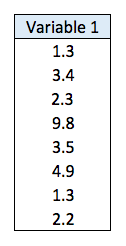

In [32]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\plot-02.PNG', width=100)

##### Plotting univariate histograms

In [7]:
penguins = sns.load_dataset("penguins")

In [34]:
type(penguins)

pandas.core.frame.DataFrame

In [35]:
penguins.shape

(344, 7)

In [36]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


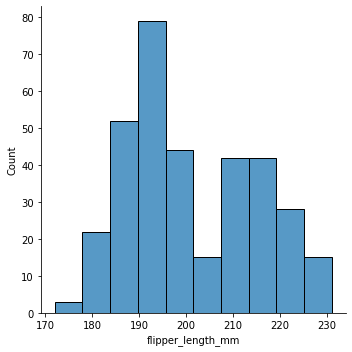

In [37]:
sns.displot(penguins, x="flipper_length_mm");

we can see that the most common flipper length is about 195 mm, but the distribution appears bimodal, so this one number does not represent the data well.

##### Choosing the bin size
- The `size of the bins` is an important parameter, and using the wrong bin size can mislead by obscuring important features of the data or by creating apparent features out of random variability. 

- By default, displot()/histplot() choose a default bin size based on the `variance` of the data and the `number of observations`. 

- But you should not be `over-reliant` on such `automatic` approaches, because they depend on particular assumptions about the structure of your data. 

- It is always advisable to check that your impressions of the distribution are consistent across different bin sizes. 

- To choose the size directly, set the `binwidth` parameter:

In [38]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [39]:
penguins['flipper_length_mm'].var(), penguins['flipper_length_mm'].std()

(197.73179160021277, 14.061713679356894)

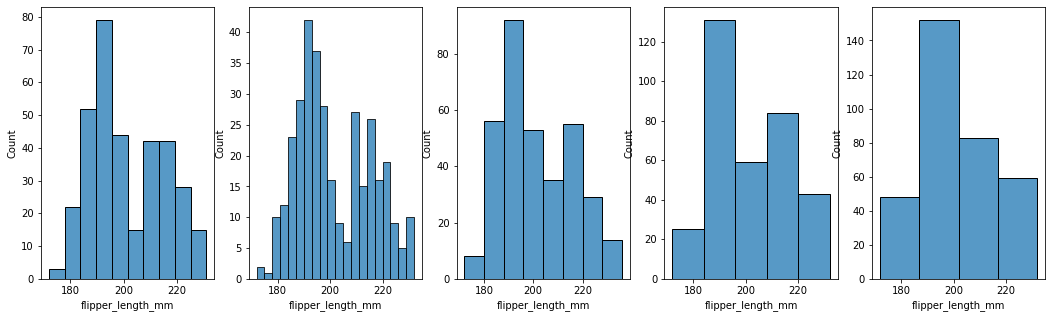

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18, 5))

sns.histplot(penguins, x="flipper_length_mm",             ax=axes[0])
sns.histplot(penguins, x="flipper_length_mm", binwidth=3, ax=axes[1])
sns.histplot(penguins, x="flipper_length_mm", binwidth=8, ax=axes[2])
sns.histplot(penguins, x="flipper_length_mm", binwidth=12, ax=axes[3])
sns.histplot(penguins, x="flipper_length_mm", binwidth=15, ax=axes[4]);

In other circumstances, it may make more sense to specify the `number of bins`, rather than their size:

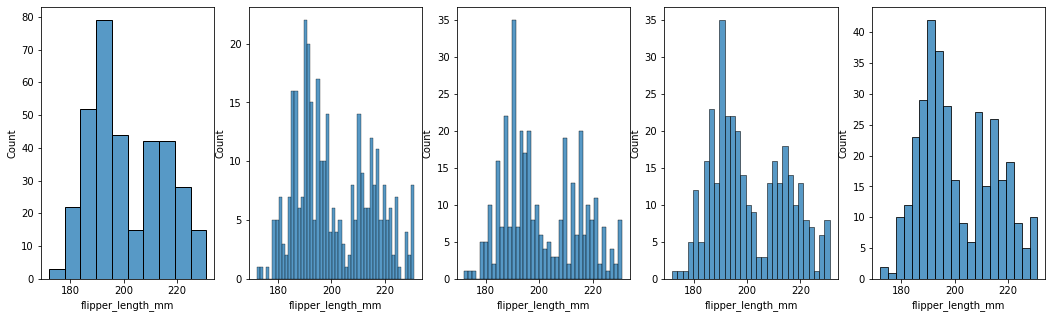

In [41]:
fig, axes = plt.subplots(1, 5, figsize=(18, 5))
sns.histplot(penguins, x="flipper_length_mm",             ax=axes[0])
sns.histplot(penguins, x="flipper_length_mm", bins=50, ax=axes[1])
sns.histplot(penguins, x="flipper_length_mm", bins=40, ax=axes[2])
sns.histplot(penguins, x="flipper_length_mm", bins=30, ax=axes[3])
sns.histplot(penguins, x="flipper_length_mm", bins=20, ax=axes[4]);

One example of a situation where defaults fail is when the variable takes a relatively small number of integer values. In that case, the default bin width may be too small, creating awkward gaps in the distribution:

In [42]:
tips = sns.load_dataset("tips")

In [43]:
tips.sample(10)

,total_bill,tip,sex,smoker,day,time,size
10,10.27,1.71,Male,No,Sun,Dinner,2
167,31.71,4.50,Male,No,Sun,Dinner,4
81,16.66,3.40,Male,No,Thur,Lunch,2
178,9.60,4.00,Female,Yes,Sun,Dinner,2
26,13.37,2.00,Male,No,Sat,Dinner,2
62,11.02,1.98,Male,Yes,Sat,Dinner,2
13,18.43,3.00,Male,No,Sun,Dinner,4
226,10.09,2.00,Female,Yes,Fri,Lunch,2
78,22.76,3.00,Male,No,Thur,Lunch,2
112,38.07,4.00,Male,No,Sun,Dinner,3


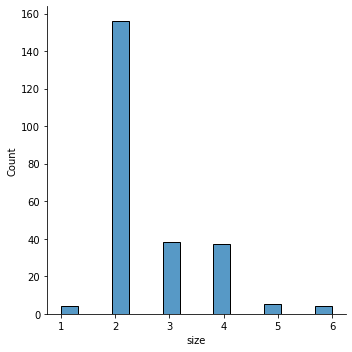

In [44]:
sns.displot(tips, x="size");

In [45]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [46]:
tips['size'].value_counts()

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

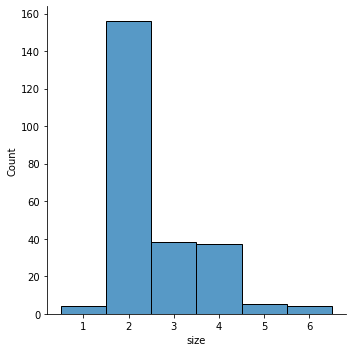

In [47]:
sns.displot(tips, x="size", discrete=True);

##### Conditioning on other variables

Once you understand the distribution of a variable, the next step is often to ask `whether features of that distribution differ across other variables` in the dataset. 

For example, what accounts for the `bimodal` distribution of `flipper lengths` that we saw above? 

`displot()` and `histplot()` provide support for conditional subsetting via the `hue` semantic. 

Assigning a variable to `hue` will draw a separate histogram for each of its unique values and distinguish them by color:

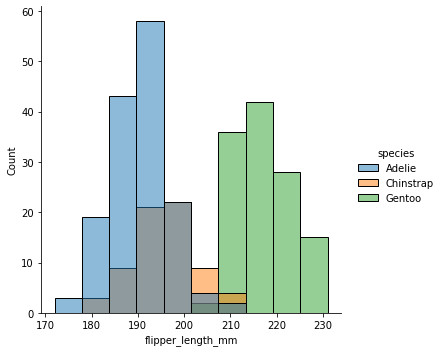

In [48]:
sns.displot(penguins, x="flipper_length_mm", hue="species");

By default, the different histograms are “layered” on top of each other and, in some cases, they may be difficult to distinguish. One option is to change the visual representation of the histogram from a bar plot to a “step” plot:

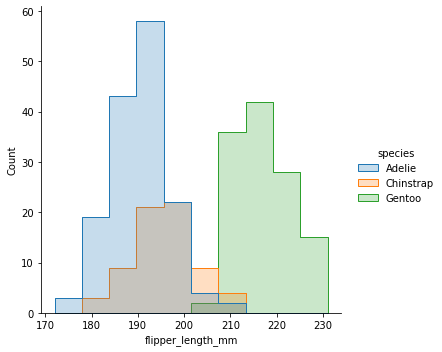

In [17]:
sns.displot(penguins, x="flipper_length_mm", hue="species", element="step");

Alternatively, instead of layering each bar, they can be “stacked”, or moved vertically. In this plot, the outline of the full histogram will match the plot with only a single variable:

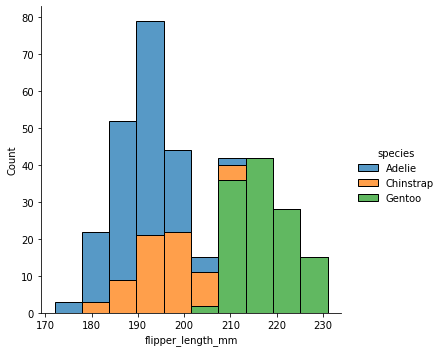

In [18]:
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack");

The stacked histogram emphasizes the `part-whole` relationship between the variables, but it can obscure other features (for example, it is difficult to determine the mode of the Adelie distribution. 

Another option is “dodge” the bars, which moves them horizontally and reduces their width. This ensures that there are `no overlaps` and that the bars remain comparable in terms of height. But it only works well when the categorical variable has a small number of levels:

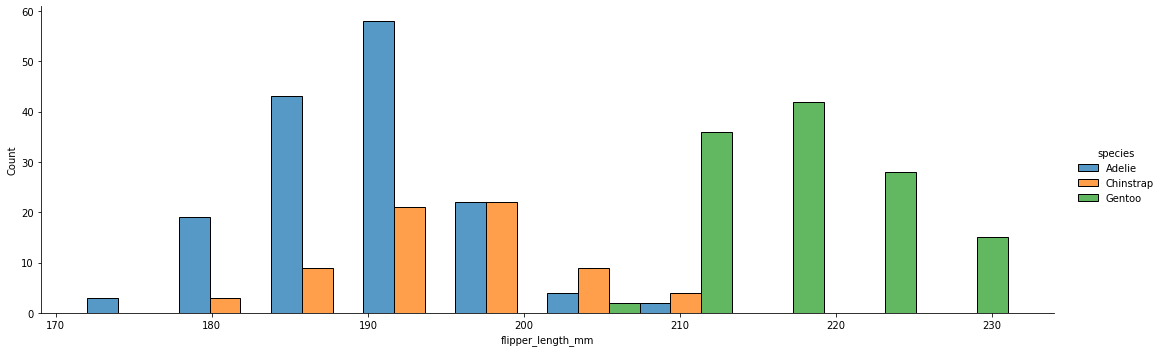

In [19]:
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="dodge", height=5, aspect=3);

- Example using D:\MYLEARN\DATASETS\netflix_titles.csv

In [49]:
import pandas as pd

In [50]:
df_netflix = pd.read_csv(r'D:\MYLEARN\DATASETS\netflix_titles.csv')

In [51]:
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [52]:
# Extract feature we're interested in
data = df_netflix['release_year']

In [53]:
data.sample(5)

6295    2019
5542    2002
1427    2013
3       2009
2767    2018
Name: release_year, dtype: int64

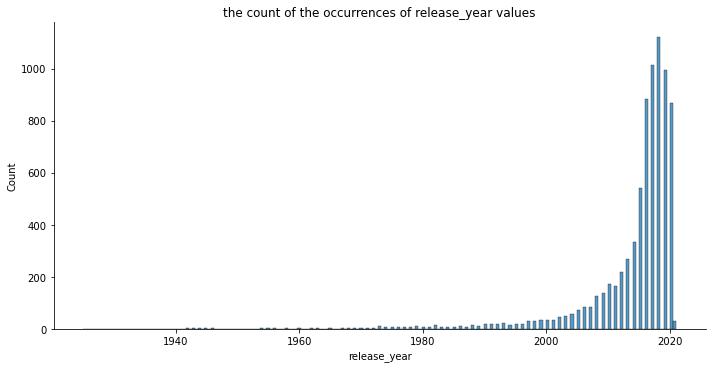

In [55]:
# Generate histogram/distribution plot

sns.displot(data, height= 5, aspect=2)
plt.title('the count of the occurrences of release_year values');

Now 
- make each bin encompass data in ranges of 3 years
- set a fixed number of bins
- get rid of the awkward gaps is to set the discrete argument to

In [44]:
data

0       2020
1       2016
2       2011
3       2009
4       2008
        ... 
7782    2005
7783    2015
7784    2019
7785    2019
7786    2019
Name: release_year, Length: 7787, dtype: int64

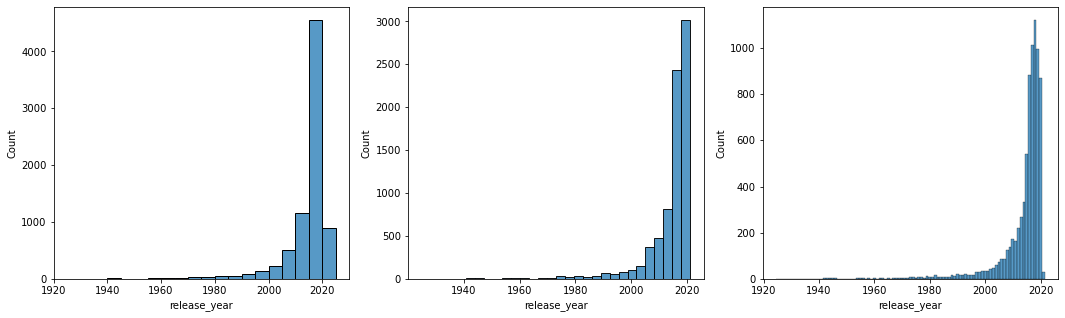

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(data,     binwidth=5,    ax=axes[0])
sns.histplot(data,     bins=30,       ax=axes[1])
sns.histplot(data,     bins=20, discrete=True, ax=axes[2]);

---------------------------
#### Kernel density estimation
----------------------------
- A histogram aims to approximate the underlying probability density function that generated the data by binning and counting observations. 

- Kernel density estimation (KDE) presents a different solution to the same problem. Rather than using discrete bins, a KDE plot `smooths` the observations with a Gaussian kernel, producing a continuous density estimate

- Kdeplot is a `Kernel Distribution Estimation` Plot which depicts the `probability density function` of the continuous or non-parametric data variables i.e. we can plot for the univariate or multiple variables altogether.

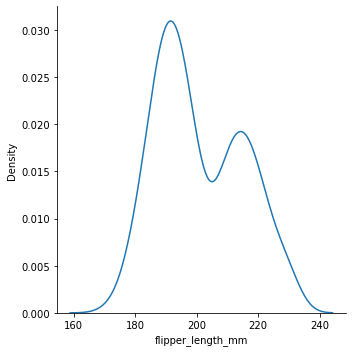

In [57]:
sns.displot(penguins, x="flipper_length_mm", kind="kde");

##### Choosing the smoothing bandwidth

Much like with the `bin` size in the histogram, the ability of the KDE to accurately represent the data depends on the choice of `smoothing bandwidth`. 

An `over-smoothed` estimate might erase meaningful features, but an `under-smoothed` estimate can obscure the true shape within random noise. 

The easiest way to check the robustness of the estimate is to adjust the `default bandwidth`:

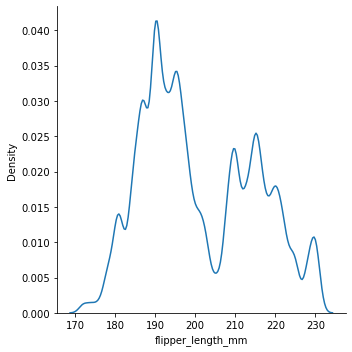

In [21]:
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=.25);

narrow bandwidth makes the bimodality much more apparent, but the curve is much less smooth. In contrast, a larger bandwidth obscures the bimodality almost completely:

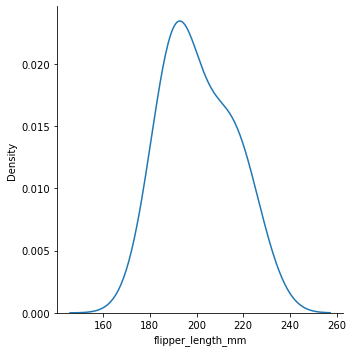

In [22]:
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=2);

##### Conditioning on other variables
As with histograms, if you assign a `hue` variable, a separate density estimate will be computed for each level of that variable:

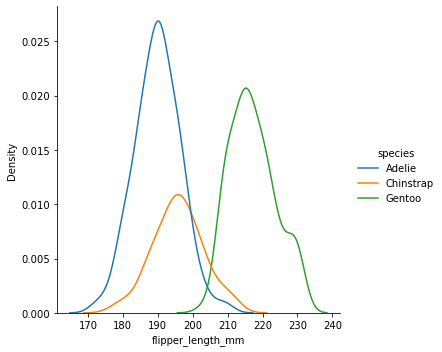

In [58]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde");

In many cases, the `layered KDE is easier to interpret` than the `layered histogram`, so it is often a good choice for the task of comparison. 

Many of the same options for resolving multiple distributions apply to the KDE as well, however:

#### Why we are not so hung up on perfectly normal distribution?

- in real life data
    - a lots of columns (100+) 
        - so not possible to look at the KDE for each column
    - even if the data in a col is not normally distributed, ML will work JUST fine
    - since we are having many columns
        - the data in the n dim (cols) vector space
            - discriminatory

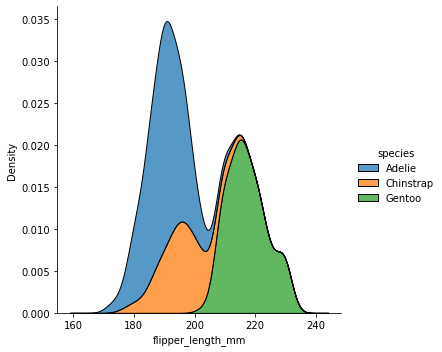

In [24]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", multiple="stack");

##### Kernel density estimation pitfalls
- KDE plots have many advantages. 
    - Important features of the data are easy to discern (central tendency, bimodality, skew), and they afford easy comparisons between subsets. 
- But there are also situations where `KDE poorly represents` the underlying data. 
    - This is `because` the logic of KDE assumes that the underlying distribution is `smooth and unbounded`. 
    - One way this assumption can fail is when a varible reflects a quantity that is naturally bounded. 
    - If there are observations lying close to the bound (for example, small values of a variable that cannot be negative), the KDE curve may extend to unrealistic values:

In [59]:
tips['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

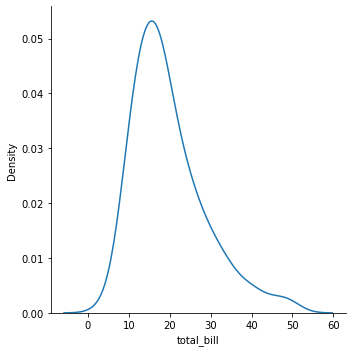

In [27]:
sns.displot(tips, x="total_bill", kind="kde");

- The KDE approach also `fails` for 
    - `discrete` data or 
    - when data are naturally continuous but `specific` values are over-represented. 
    
- The important thing to keep in mind is that the `KDE will always show you a smooth curve`, even when the data themselves are not smooth. 

For example, consider this distribution of diamond weights:

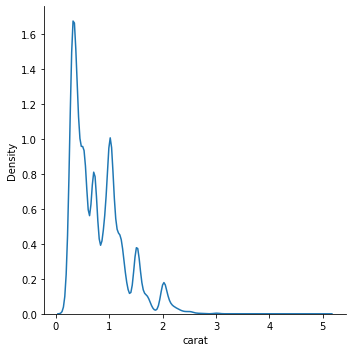

In [54]:
diamonds = sns.load_dataset("diamonds")
sns.displot(diamonds, x="carat", kind="kde");

In [62]:
len(diamonds['carat'].unique())

273

In [64]:
diamonds['carat'].value_counts()

0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
        ... 
2.70       1
3.67       1
5.01       1
2.77       1
3.40       1
Name: carat, Length: 273, dtype: int64

While the KDE suggests that there are peaks around specific values, the histogram reveals a much more jagged distribution:

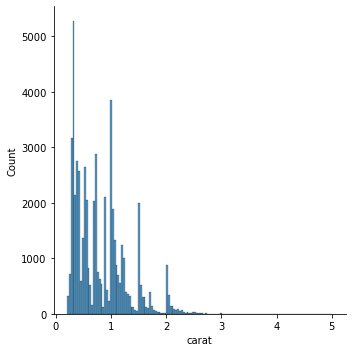

In [66]:
sns.displot(diamonds, x="carat");

it is possible to combine these two approaches. 

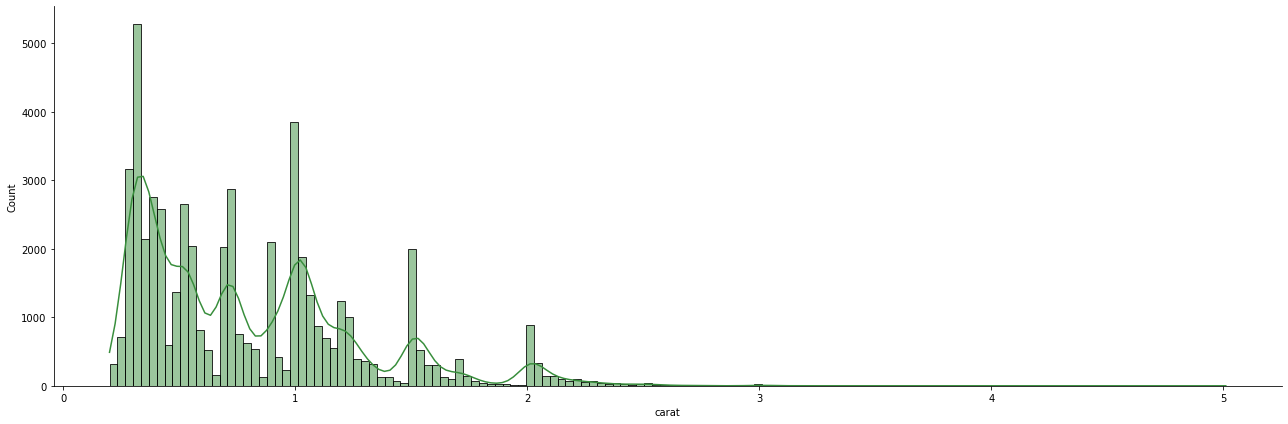

In [76]:
sns.displot(diamonds, x="carat", color='#388E3C', kde=True, height=6, aspect=3);

##### Empirical cumulative distributions
A third option for visualizing distributions computes the “empirical cumulative distribution function” (ECDF). 

This plot draws a `monotonically-increasing` curve through each datapoint such that the height of the curve reflects the `proportion of observations` with a smaller value:

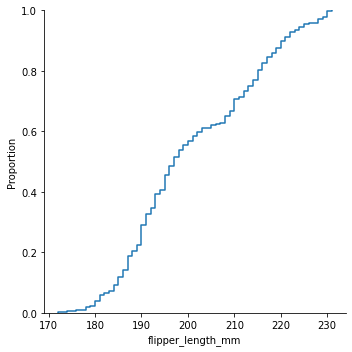

In [78]:
sns.displot(penguins, x="flipper_length_mm", kind="ecdf");

 because the curve is monotonically increasing, it is well-suited for comparing multiple distributions:

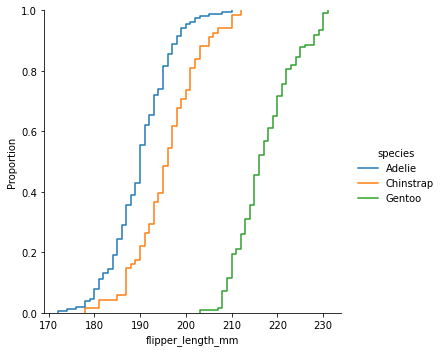

In [80]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="ecdf");

----------------------
#### Visualizing bivariate distributions
------------------------

Assigning a second variable to y, however, will plot a bivariate distribution:

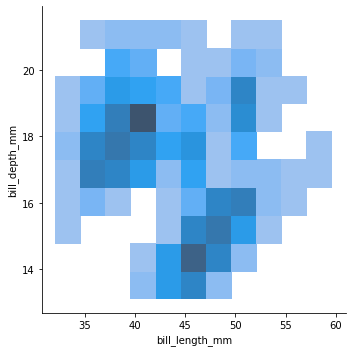

In [82]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm");

A bivariate histogram bins the data within rectangles that tile the plot and then shows the `count of observations within each rectangle` with the fill color (analagous to a heatmap()).

Assigning a `hue` variable will plot multiple heatmaps or contour sets using different colors. For bivariate histograms, this will only work well if there is minimal overlap between the conditional distributions:

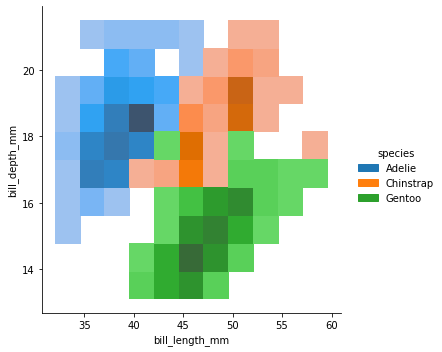

In [84]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species");

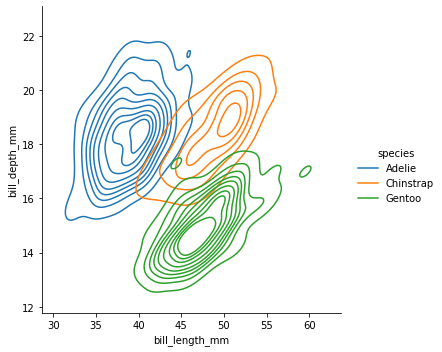

In [86]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde");

----------------------
#### Plotting joint and marginal distributions
---------------------------

The first is `jointplot()`, which augments a `bivariate` relatonal or distribution plot with the marginal distributions of the two variables. 

By default, jointplot() represents the `bivariate distribution` using `scatterplot()` and the `marginal distributions` using `histplot()`:

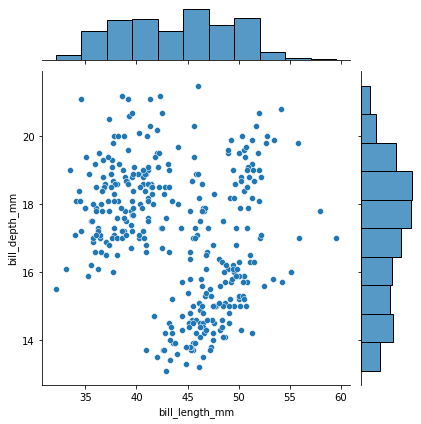

In [88]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm");

Similar to `displot()`, setting a different `kind="kde"` in jointplot() will change both the joint and marginal plots the use kdeplot():

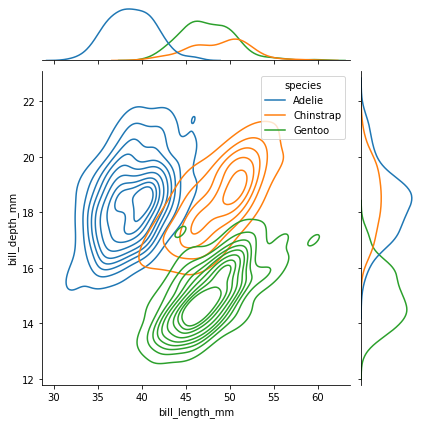

In [91]:
sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde"
);

`jointplot()` is a convenient interface to the JointGrid class, which offeres more flexibility when used directly:

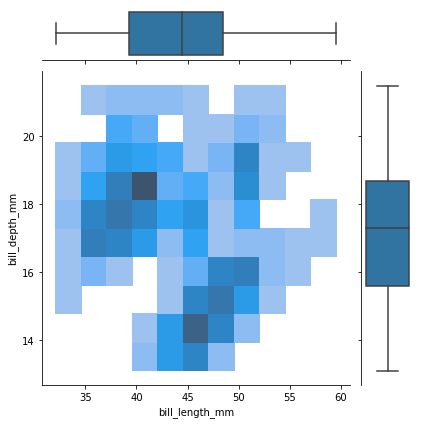

In [93]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot);

A less-obtrusive way to show marginal distributions uses a `rug` plot, which adds a small tick on the edge of the plot to represent each individual observation. 

This is built into displot():

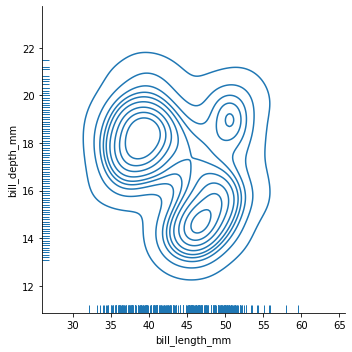

In [95]:
sns.displot(
    penguins, x="bill_length_mm", y="bill_depth_mm",
    kind="kde", rug=True
);

#### Plotting many distributions
The `pairplot()` function offers a similar blend of joint and marginal distributions. 

Rather than focusing on a single relationship, however, pairplot() uses a “small-multiple” approach to visualize the univariate distribution of all variables in a dataset along with all of their pairwise relationships:

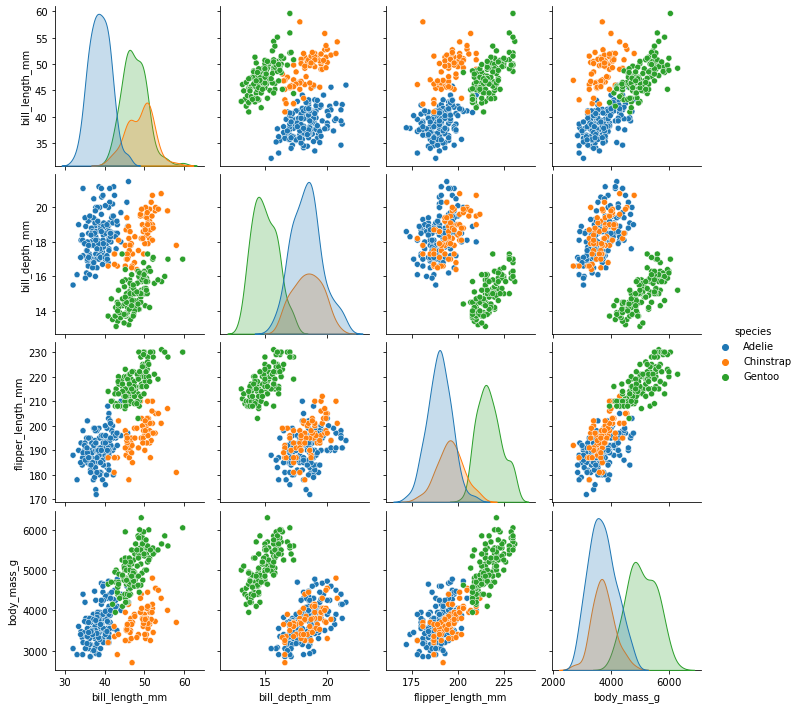

In [98]:
sns.pairplot(penguins, hue="species");